# Lab 12: Misc Practice

In [2]:
options(repr.plot.width=6, repr.plot.height=4)

library(tidyverse)
library(stringr)
library(tidytext)
library(lubridate)
library(nycflights13)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



### Question 4 in Quiz
Write a age function **age_printer**, which, given a birthdate in any of the forms shown below, prints out how many days old that person is today

In [3]:
require(lubridate)

In [4]:
age_printer = function(date){
    date = mdy(date)
    age = as.numeric(today() - date)
    sprintf("You are %s days old.", age)
}
day = "September 26, 1982"
age_printer(day)

[1] "You are 13583 days old."

### Question 5 in Quiz
Call an airplane small if it has less than 30 seats. As a fraction of their total number of flights scheduled to depart NYC airports in 2013, which carrier had the highest fraction of flights on small airplanes, and what is that fraction (expressed as a number between 0 and 1)? (If the number of seats is not known for a particular airplane, assume that it is not small.) Enter your answers on the first two lines of the box below, and the code you used to find them in the remaining lines.

In [5]:
require(nycflights13)

In [6]:
planes_small = planes %>% select(tailnum, seats)
flights_small = flights %>% 
                    select(carrier, flight, tailnum, time_hour) %>%
                    left_join(planes_small) %>% 
                    mutate(seats = ifelse(is.na(seats), 
                                          max(seats, na.rm=T), seats)) %>%
                    group_by(carrier) %>%
                    summarize(fraction = sum(seats <= 30)/n()) %>% arrange(-fraction)
head(flights_small)

Joining, by = "tailnum"


carrier,fraction
B6,0.3603733870
US,0.2364627970
MQ,0.0378830928
AA,0.0331204742
YV,0.0066555740
FL,0.0009202454


### Q6 in Quiz

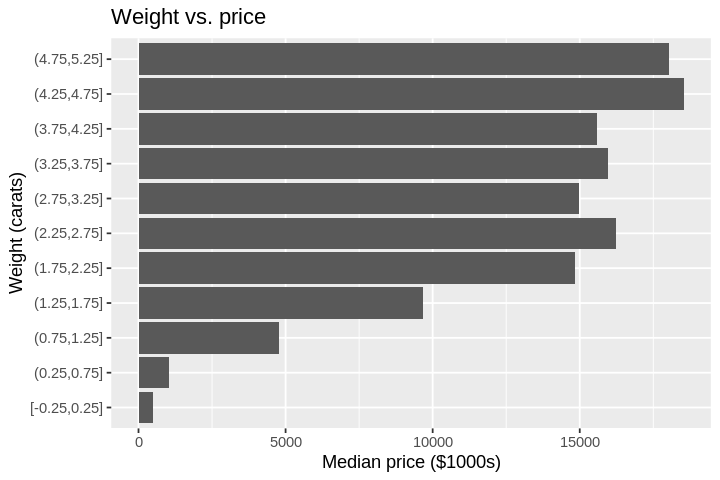

In [40]:
test = seq(-0.25, 5.25, length.out = 1000)
breaks = seq(-0.25, 5.25, by = 0.5)
diamonds %>% mutate(weight_interval = cut(carat, breaks=breaks, include.lowest=TRUE)) %>%
    group_by(weight_interval) %>%
    summarize(median_price = median(price)) %>% 
    ggplot + geom_col(mapping=aes(x = weight_interval, y=median_price)) +
    coord_flip() + xlab('Weight (carats)') + ylab('Median price ($1000s)') + 
    ggtitle('Weight vs. price')

## Q1: News Headlines

We are going to look through headlines from ABC News. The following loads the dataset we will use.


In [7]:
headlines = read_csv('https://raw.githubusercontent.com/byoungwookjang/stats306_labs/master/lab13/abcnews_2017.csv', 
                     col_types=list(col_character(), col_character()))
load("afinn.RData")
sents = afinn
head(headlines)
head(sents)

publish_date,headline_text
<chr>,<chr>
20170101,1986 queensland cabinet documents released
20170101,actor william cristopher mash chaplain dead at 84
20170101,adelaide hip hop artist dreams becoming influential in australia
20170101,adelaide's new year's fireworks
20170101,adelaides new years fireworks
20170101,ambulances ferry injured to hospital istanbul nightclub attack


word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


### 1.1

Create `headlines1` in which `publish_date` is converted the appropriate date format and there is an additional `id` variable that gives each headline a unique id number.

In [8]:
headlines1 = NA

### 1.2

Using `headlines1` and the `sents` dataset we loaded (which contains sentiment scores for each word), create `headlines2`, which adds a variable called `score` that contains the sentiment score for that word. Note that the sentiment score is simply the sum of the sentiment scores for each word in the headline.

In [2]:
headlines2 = NA

### 1.3

Write a function `get_headlines` that takes a string `keyword` as an argument and returns a subset of `headlines2` with only rows where the headline contains the given `keyword`. The returned dataframe should contain an additional column titled `keyword` that contains the keyword provided to the function.

In [ ]:
get_headlines = function(keyword) {
    
}

head(get_headlines('iran'))

### 1.4

Using `get_headlines`, create a dataframe `headlines4` which, for each country in `country_interest`, contains the headlines associated with that country. The result should be a single dataframe. You should be able to do this with a one-liner.

In [3]:
country_interest = c('china', 'india', 'russia', 'syria', 'indonesia',
                     'japan', 'israel', 'iraq', 'iran', 'philippines',
                     'united states', 'france')

headlines4 = NA

### 1.5

Do whatever data management and plotting you need to replicate the following plot using `headlines4`. 

If you want to match the colors exactly, the colors I use for the endpoints of my scale are `muted('red')` and `muted('green')`.

![plot](stats306_lab13_prob3.png)

### Problem 10 from Practice Exam

In [44]:
require(forcats)
head(gss_cat)

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


In [52]:
# a) What is the median reported age for Jewish respondents?
gss_data = gss_cat
unique(gss_data$relig)
gss_data %>% filter(relig == 'Jewish') %>% summarize(median(age, na.rm=T))

[1] Protestant              Orthodox-christian      None                   
 [4] Christian               Jewish                  Catholic               
 [7] Other                   Inter-nondenominational Hinduism               
[10] Native american         No answer               Buddhism               
[13] Moslem/islam            Other eastern           Don't know             
16 Levels: No answer Don't know Inter-nondenominational ... Not applicable

"median(age, na.rm = T)"
<int>
53


#### b) A millennial is defined to be someone who was 18 or younger in the year 2000. Are the millennials in this survey more likely to identify as atheist (relig =='None') compared to earlier generations?

In [54]:
unique(gss_data$year)
gss_data %>% 
    filter(!is.na(age)) %>%
    mutate(age_2000 = age - (year-2000),
           millenial = ifelse(age_2000 <= 18, 
                              'millenial', 'not millenial')) %>%
    group_by(millenial) %>%
    summarize(atheist = sum(relig=='None')/n())
            

[1] 2000 2002 2004 2006 2008 2010 2012 2014

millenial,atheist
<chr>,<dbl>
millenial,0.2920228
not millenial,0.1501995


### c) Consider the following two possible models relating age and hours spent watching TV:

* lm(age~tvhours)
* lm(age~ poly(tvhours, 2))

Warning message:
“Removed 38 rows containing missing values (geom_point).”

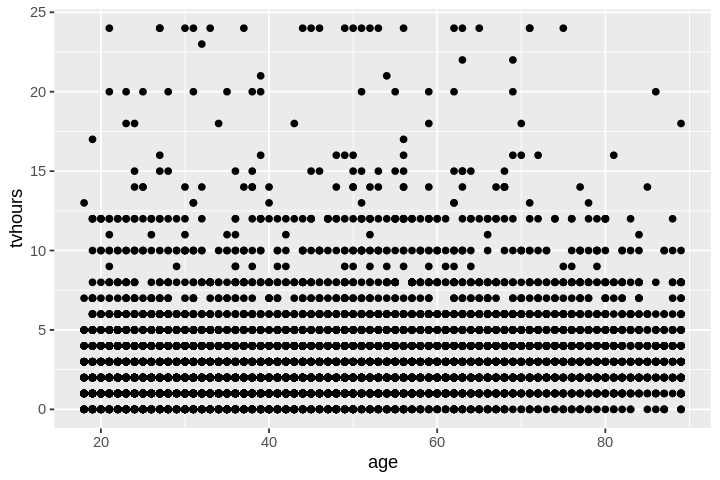

In [69]:
require(stats)
require(modelr)
gss_data = gss_cat %>% filter(!is.na(tvhours))
ggplot(gss_data) + geom_point(mapping=aes(x=age, y=tvhours))

In [75]:
tv_model1 = lm(age ~ tvhours, data = gss_data)
summary(tv_model1)


Call:
lm(formula = age ~ tvhours, data = gss_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.075 -14.181  -1.346  11.875  44.598 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.40171    0.24700  179.76   <2e-16 ***
tvhours      0.94471    0.06254   15.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.22 on 11297 degrees of freedom
  (38 observations deleted due to missingness)
Multiple R-squared:  0.0198,	Adjusted R-squared:  0.01971 
F-statistic: 228.2 on 1 and 11297 DF,  p-value: < 2.2e-16


In [76]:
tv_model2 = lm(age ~ poly(tvhours, 2), data = gss_data)
summary(tv_model2)


Call:
lm(formula = age ~ poly(tvhours, 2), data = gss_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.739 -13.974  -1.111  11.968  47.263 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         47.2182     0.1608  293.64   <2e-16 ***
poly(tvhours, 2)1  260.4601    17.1040   15.23   <2e-16 ***
poly(tvhours, 2)2 -219.2817    17.1024  -12.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.09 on 11296 degrees of freedom
  (38 observations deleted due to missingness)
Multiple R-squared:  0.03386,	Adjusted R-squared:  0.03369 
F-statistic: 197.9 on 2 and 11296 DF,  p-value: < 2.2e-16


### Regression problems

In [97]:
head(diamonds)
# dm = diamonds[sample(1:nrow(diamonds), 2000),]
dm = diamonds %>% group_by(cut) %>% sample_n(500) %>% ungroup

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


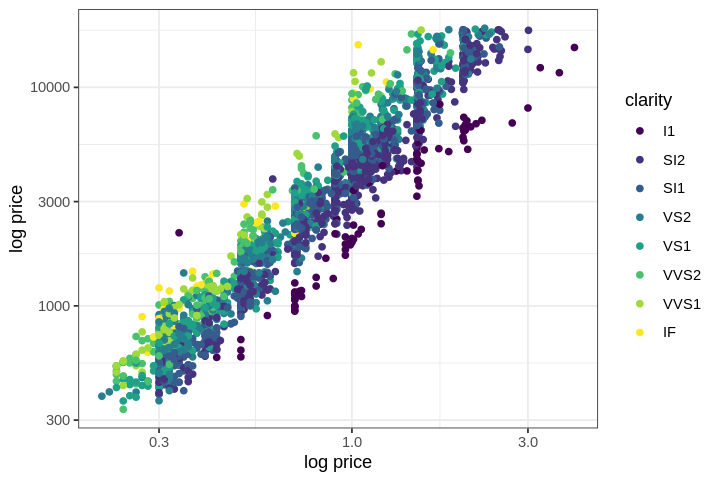

In [101]:
ggplot(dm) + geom_point(mapping=aes(x=carat, y=price, color=clarity)) + 
    scale_x_log10() + scale_y_log10() + theme_bw() + ylab('log price') + xlab('log price')

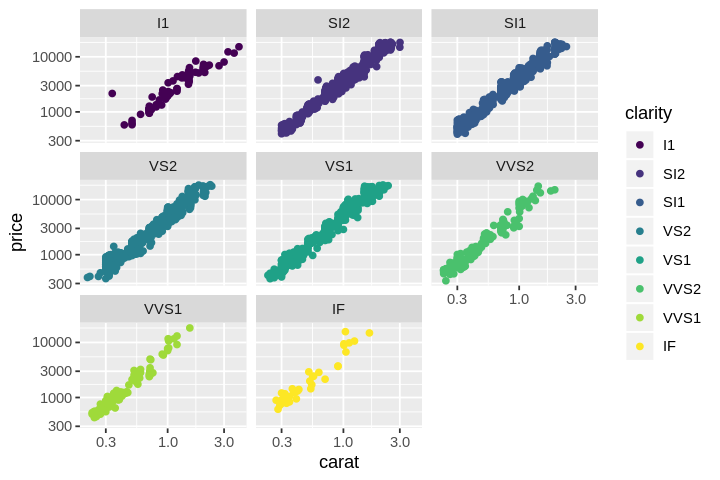

In [102]:
ggplot(dm) + geom_point(mapping=aes(x=carat, y=price, color=clarity)) + 
    scale_x_log10() + scale_y_log10() + facet_wrap( ~ clarity)

### Should you use interaction or additive?
Which model should you use?
* log(price) ~ log(carat) * clarity
* log(price) ~ log(carat) + clarity